Este documento es propiedad el **Equipo 7** y corresponde a la entrega *Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos* del curso TC3006C. Nuestro equipo esta conformado por:

* Rodolfo Sandoval Schipper A01720253
* Marcelo Márquez A01720588
* Arturo Garza Campuzano A00828096

# Limpieza del Conjunto de Datos

La **limpieza de datos** es un proceso esencial para el análisis y procesamiento de datos que implica la detección y corrección de errores, inconsistencias y valores en conjuntos de datos. Durante esta etapa son requeridos los siguientes elementos:

1. Limpia de datos con el uso de herramientas ETL
2. Explicación y documentación de cada decisión tomada sobre cómo limpiar los atributos y valores. Se explica también cuáles son las variables que se creen que son más relevantes para el modelo y por qué.
3. Aplicación de las transformaciones necesarias a los datos usando herramientas de ETL.
4. Explicación y documentación de cada decisión que hayamos tomado sobre cómo transformar cada variable.

Esa limpieza se realizará sobre el conjunto de datos de un reto clásico: **predecir si una persona sobrevivió o no al desastre del Titanic**. Para conocer más sobre este reto se puede consultar el siguiente link: https://www.kaggle.com/competitions/titanic

Este proceso de limpieza comprendera de los siguientes **apartados**:
1. Definición del problema
2. Adquisición del conjunto de datos de entrenamiento y prueba para el modelo
3. Imputar, preparar y limpiar datos
4. Modelar, predecir y resolver el problema

## Definición del problema

El 15 de abril de 1912 el Titanic RMS se hundió después de haber chocado con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos los que estaban a bordo, lo cual resultó en el fallecimiento de 1502 de los 2224 pasajeros y tripulantes. Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

El reto consiste en construir un modelo de predicción que responda a la siguiente pregunta: ¿qué tipo de personas tenían más probabilidades de sobrevivir? Para responderla se deben utilizar los datos de los pasajeros que están en los archivos train.csv y test.csv, disponibles en la plataforma Kaggle: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic).

El archivo train.csv contiene detalles de un subconjunto de 891 pasajeros, en el cual se revela cuáles de estos pasajeros sobrevivieron o no al accidente (ground truth). Por otro lado, el archivo test.csv contiene información similar pero no revela el resultado de supervivencia de cada pasajero. Este último archivo se utilizará para probar la efectividad del modelo de predicción. Utilizando los patrones encontrados en los datos de train.csv, se necesita predecir si los otros 418 pasajeros a bordo (test.csv) sobrevivieron.

La métrica de éxito para este reto corresponde al porcentaje de similitud que tienen los resultados de nuestro modelo comparado con los datos reales.

En este documento sólo se cubre el primer paso para la construcción de cualquier modelo de inteligencia artifical para la ciencia de datos, y esto es la **limpieza de datos**.


## 1. Importar módulos

In [ ]:
# Limpieza y analisis de datos
import pandas as pd
import numpy as np
import random as rnd
import math
from scipy.stats import skew, kurtosis

# Visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Cargar datos (Extract)

In [ ]:
# Este bloque de codigo no es necesario si el archivo esta guardado localmente
from google.colab import drive
drive.mount('/content/drive')

#Cambiar ruteo con de acuerdo a la ubicacion los archivos en su dispositivo
train_df = pd.read_csv('/content/drive/MyDrive/TC3006C.101_OpenAIGPT/Reto/Datos/Evidencia01/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/TC3006C.101_OpenAIGPT/Reto/Datos/Evidencia01/test.csv')
train_df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pclass,Age,Sex,IsAlone,Fare,Embarked,Title,Survived
0,3,2,1,0,1,2,1,0
1,1,4,0,0,5,1,2,1
2,3,2,0,1,2,2,3,1
3,1,4,0,0,5,2,2,1
4,3,4,1,1,2,2,1,0
...,...,...,...,...,...,...,...,...
886,2,3,1,1,3,2,5,0
887,1,1,0,1,4,2,3,1
888,3,2,0,0,4,2,3,0
889,1,2,1,1,4,1,1,1


In [ ]:
# Filtrar pasajeros con "Fare" igual a 0.000000
pasajeros_con_fare_cero = train_df[train_df['Fare'] == 0.000000]

# Imprimir los pasajeros con "Fare" igual a 0.000000
print(len(pasajeros_con_fare_cero))
pasajeros_con_fare_cero

15


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## 3. Exploración de la base de datos (EDA)

### 3.1 Cálculo de mediads estadísticas

#### 3.1.1 Variables cuantitativas

Considerando la descripción de las variables proporcionada por el [diccionario de datos](https://www.kaggle.com/competitions/titanic/data) y los valores observados para cada variable se puede contemplar que las siguientes **variables** son **cuantitativas**: Age, SibSp, Parch y Fare.

Utilizando la función **describe()** se obtienen, por cada una de estas variables, los siguientes datos: cantidad de registros, media, desviación estándar, cuantiles, mínimo y máximo valor.

Estas vairables se guardan en un dataframe llamado **variables_cuantitativas** para facilitar su posterior análisis.

In [ ]:
# Seleccionar las variables tipo number del dataframe original
variables_cuantitativas = train_df.select_dtypes(include=['number'])
variables_cuantitativas.drop(columns=['PassengerId', 'Survived', 'Pclass'], inplace=True)
variables_cuantitativas.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Observaciones:**
 - **Age** cuenta con valores nulos (19.87%).
 - Las métricas de **SibSp** y **Parch** no parecen ser tan diferentes, esto puede indicar que están relacionadas.
 - El mínimo para los valores de **Fare** es cero. Dentro del contexto del problema, esto significaría que algunos pasajeros accedieron de manera gratuita dentro del Titanic.

#### 3.1.2 Variables cualitativas

Tomando, otra vez, como referencia el [diccionario de datos](https://www.kaggle.com/competitions/titanic/data) y los valores observados para cada variable se puede contemplar que las siguientes **variables** son **categóricas**: Name, Sex, Ticket, Embarked, PassengerId, Survived y Pclass.  

Para cada una de estas variables se obtienen los siguientes datos: cantidad de registros, cantidad de valores únicos, primer valor y su respectiva frecuencia.

Estas variables se guardan en un dataframe llamado **variables_cualitativas** para facilitar su posterior análisis.

In [ ]:
# Seleccionar las variables tipo object del dataframe original
variables_cualitativas = train_df.select_dtypes(include=['object'])
# Crea un data frame para visualizar la descripcion por variable
vcual_df = variables_cualitativas.describe(include=['O'])

# Variables que se quieren analizar
columns_to_analyze = ['PassengerId', 'Survived', 'Pclass']

# Obtiene los datos para las variables categoricas numericas
for column in columns_to_analyze:
    count = train_df[column].count()
    unique = train_df[column].nunique()
    top = train_df[column].value_counts().idxmax()
    frequency = train_df[column].value_counts().max()

    vcual_df[column] = [count, unique, top, frequency]

variables_cualitativas = variables_cualitativas.join(train_df[['PassengerId', 'Survived', 'Pclass']])

# Elimina la variable PassengerId
variables_cualitativas.drop(columns=['PassengerId'], inplace=True)

vcual_df

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Survived,Pclass
count,891,891,891,204,889,891,891,891
unique,891,2,681,147,3,891,2,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,1,0,3
freq,1,577,7,4,644,1,549,491


**Observaciones:**
- Todos los valores de **Name** y **PassengerId** son únicos.
- Un procentaje considerable de los valores de **Ticket** (23.57%) y **Cabin** (27.94%) son únicos.
- Hay valores nulos en **Cabin** (77.10%) y **Embarked** (0.22%).
- **Sex**, **Embarked**, **Survived** y **Pcalss** cuentan con muy pocos valores únicos.

### 3.2 Exploración de datos usando herramientas de visualización

#### 3.2.1 Vairbales cuantitativas

##### 3.2.1.1 Medidas de posición
Por cada variable cuantitativa se obtienen los cuartiles, se identifican los datos atípicos y se hace un diagrama de caja y bigotes.

In [ ]:
# Calcula los cuartiles (25%, 50% y 75%)
cuartiles = variables_cuantitativas.quantile([0.25, 0.5, 0.75])

# Calcula el rango intercuartilico (IQR)
iqr = cuartiles.loc[0.75] - cuartiles.loc[0.25]

# Define los límites para detectar valores atípicos (outliers)
lower_bound = cuartiles.loc[0.25] - 1.5 * iqr
upper_bound = cuartiles.loc[0.75] + 1.5 * iqr

# Identifica los valores atípicos
outliers = ((variables_cuantitativas < lower_bound) | (variables_cuantitativas > upper_bound))

# Calcula la cantidad de valores atípicos por columna
outliers_count = outliers.sum()
outliers_count

Age       11
SibSp     46
Parch    213
Fare     116
dtype: int64

**Observaciones:**
- **Parch** (23.91%) y **Fare** (13.02%) cuentan con un alto porcentaje de datos atípicos considerando $Q1 - 1.5(IQR) \leq x \leq Q3 + 1.5(IQR)$ como los límites que los datos tiene que respetar.
- **SibSp** (5.16%) y **Age** (1.23%) cuentan con un porcentaje más bajo de datos atípicos considerando los mismos límites.

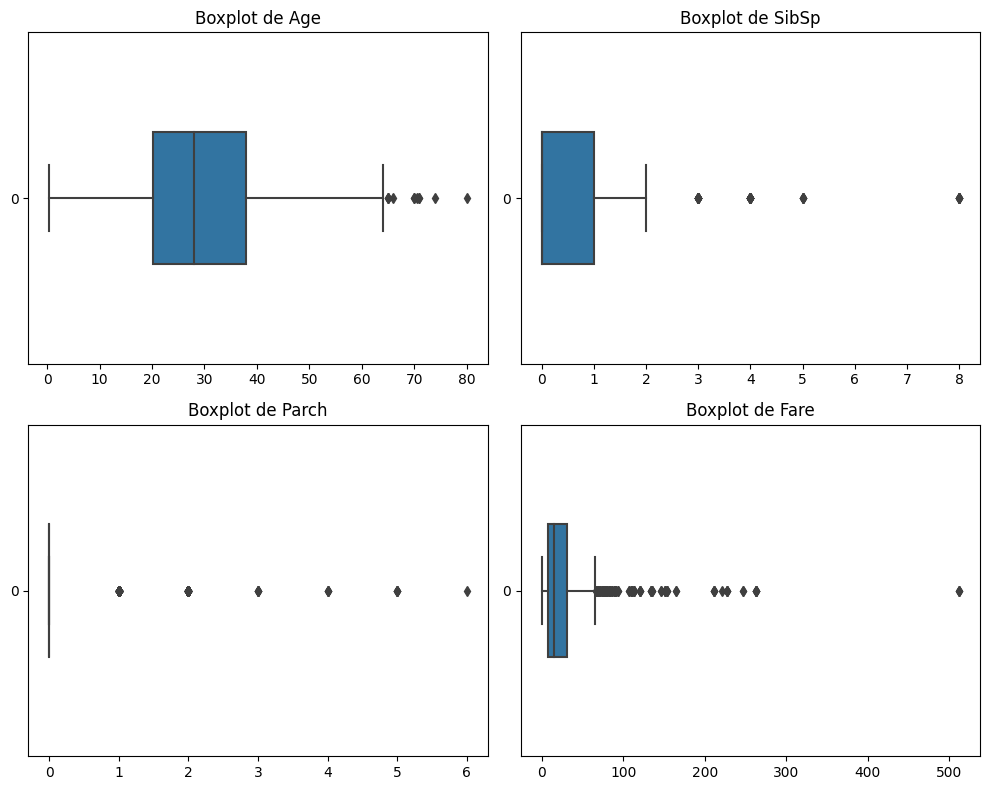

In [ ]:
# Crear una figura y matriz de subtramas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Iterar sobre las subtramas y las columnas
for ax, column in zip(axes.flatten(), variables_cuantitativas):
    sns.boxplot(data=train_df[column], orient="h", width=0.4, ax=ax)
    ax.set_title(f"Boxplot de {column}")

# Ajustar diseño de subtramas y mostrar figura
plt.tight_layout()
plt.show()

**Observaciones:**
- Estos diagramas de caja y bigotes concuerdan con la cantidad de datos atípicos por variable.
- La mayor parte de los valores de **SibSp**, **Parch** y **Fare** son cercanos a cero.
- La mayoría de los pasajeros y tripulantes cuentan con una edad entre 20 y 40 años.

##### 3.2.1.2 Análisis de distribución de los datos

Con el objetivo de analizar la distribución de los datos de las variables cuentitativas se recurren a las siguientes herramientas herramientas: histogramas, sesgo y curtosis.

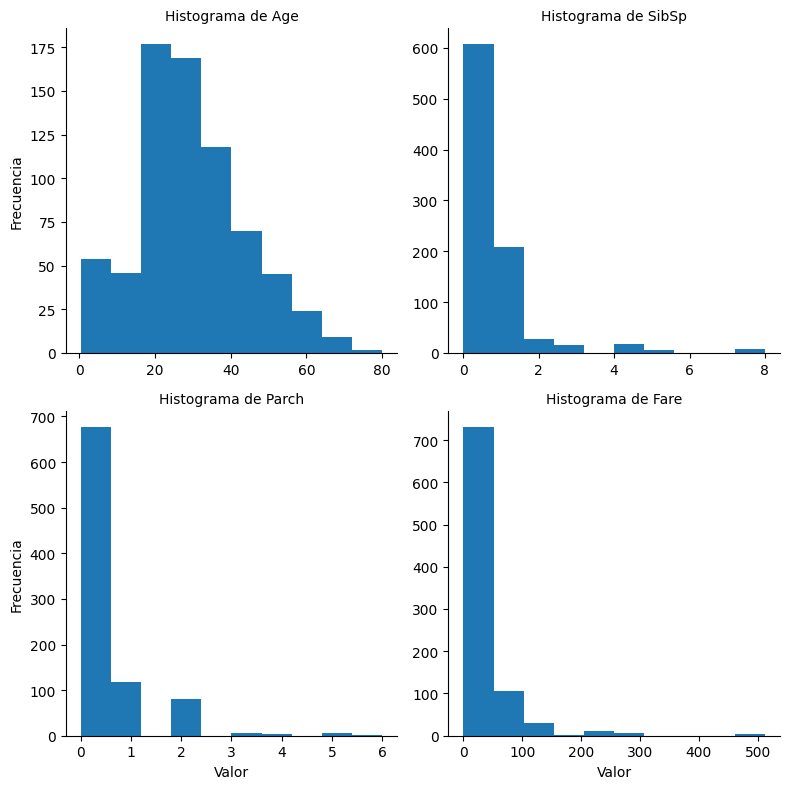

In [ ]:
# Crear un FacetGrid para histogramas
g = sns.FacetGrid(variables_cuantitativas.melt(), col="variable", col_wrap=2, sharex=False, sharey=False, height=4)

# Mapear histogramas al FacetGrid
g.map(plt.hist, "value", bins=10)
g.set_titles(col_template="Histograma de {col_name}")
g.set_axis_labels("Valor", "Frecuencia")

# Ajustar layout y mostrar gráficas
plt.tight_layout()
plt.show()

**Observaciones**:
- **Age** es la única variable con posibilidad de que su distribución sea simétrica.
- La distribución de **SibSp**, **Parch** y **Fare** es asimétrica. Sus datos se encuentra agrupados a la izquierda.

In [ ]:
# Calcular el sesgo y curtosis de cada variable
diccionario_resultados = {'Variable': [], 'Sesgo': [], 'Curtosis': []}

for columna in variables_cuantitativas.columns:
    # Filter out null values before calculating skewness and kurtosis (mencionar)
    not_null_values = variables_cuantitativas[columna].dropna()

    sesgo = skew(not_null_values, nan_policy='omit')
    curtosis = kurtosis(not_null_values, nan_policy='omit')

    diccionario_resultados['Variable'].append(columna)
    diccionario_resultados['Sesgo'].append(sesgo)
    diccionario_resultados['Curtosis'].append(curtosis)

# Crear un nuevo DataFrame con los resultados
estadisticas_df = pd.DataFrame(diccionario_resultados)

# Imprimir el nuevo DataFrame
estadisticas_df

,Variable,Sesgo,Curtosis
0,Age,0.388290,0.168637
1,SibSp,3.689128,17.773512
2,Parch,2.744487,9.716613
3,Fare,4.779253,33.204289


**Consideraciones**:
- Una distribución es simétrica cuando el coeficiente de sesgo esta entre -0.5 y 0.5.
- La forma de la distribución es mesocúrtica cuando el coeficiente de curtosis esta entre 2.5 y 3.5.

**Observaciones:**
- **Age** cuenta con la simetríca de la distribución y su forma es platicúrtica.
- **SibSp**, **Parch** y **Fare** cuentan con una distribución sesgada hacia la derecha y su forma es leptocúrtica.

##### 3.2.1.3 Análisis de colinealidad

Para analizar la colinealidad entre las variables cuantitativas y la supervivencia se utilizan las siguientes herramientas: histogramas de cada variable considerando el factor de supervivencia y diagramas de caja y bigote de cada variable por el factor de superviencia.



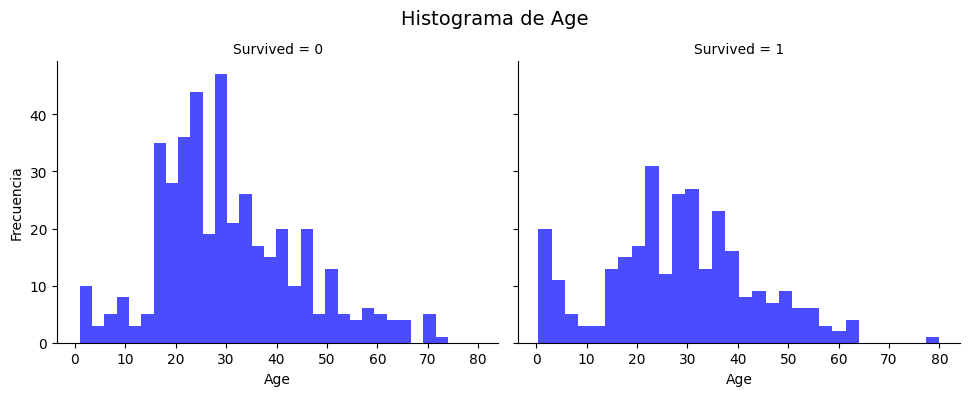

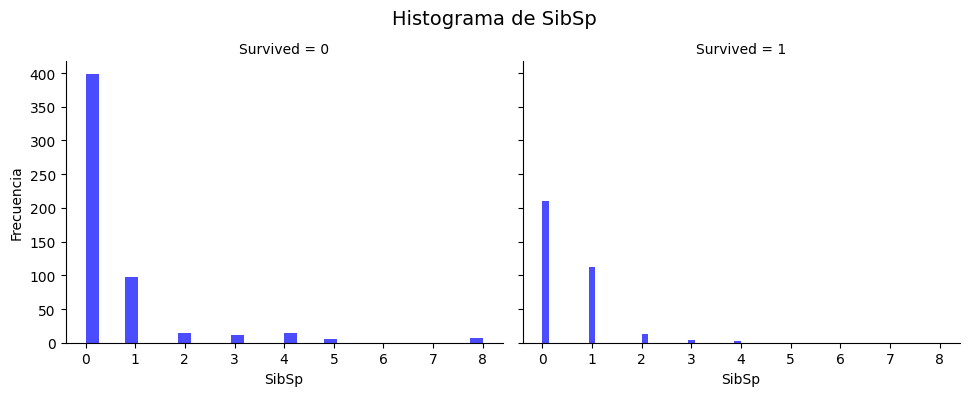

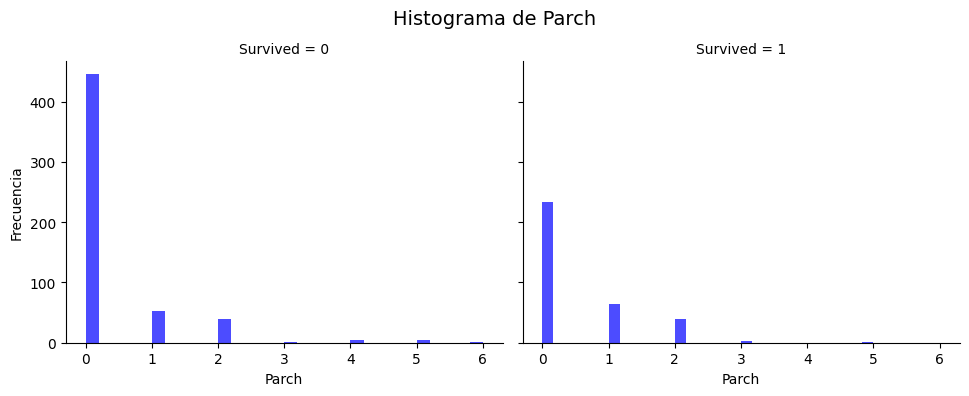

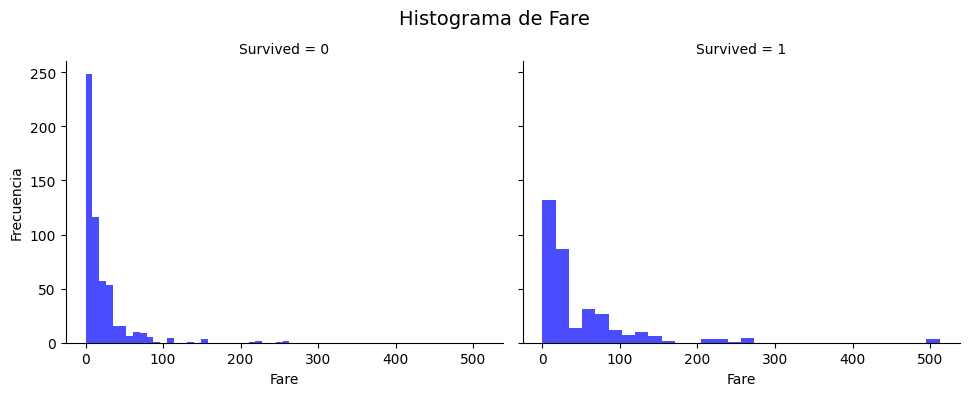

In [ ]:
# Iterate through filtered columns
for variable in variables_cuantitativas:
    # Create a FacetGrid with a larger height and aspect ratio
    g = sns.FacetGrid(train_df, col='Survived', height=4, aspect=1.2)

    # Map a histogram for the current variable with adjusted bins
    g.map(plt.hist, variable, bins=30, color='blue', alpha=0.7)

    # Set a title for the current plot
    plt.subplots_adjust(top=0.85)  # Adjust the title position
    g.fig.suptitle(f'Histograma de {variable}', fontsize=14)

    # Set axis labels
    g.set_axis_labels(f'{variable}', 'Frecuencia')

# Show the plots
plt.show()

**Observación**: En todo par de distribuciones por variable cuantitativa parecer ser que la distribución mantienen su forma pero su propoción disminuye; las distribuciones de los que no sobrevivieron alcanzan valores más elevados que en las distribuciones pertenecientes a los supervivientes.

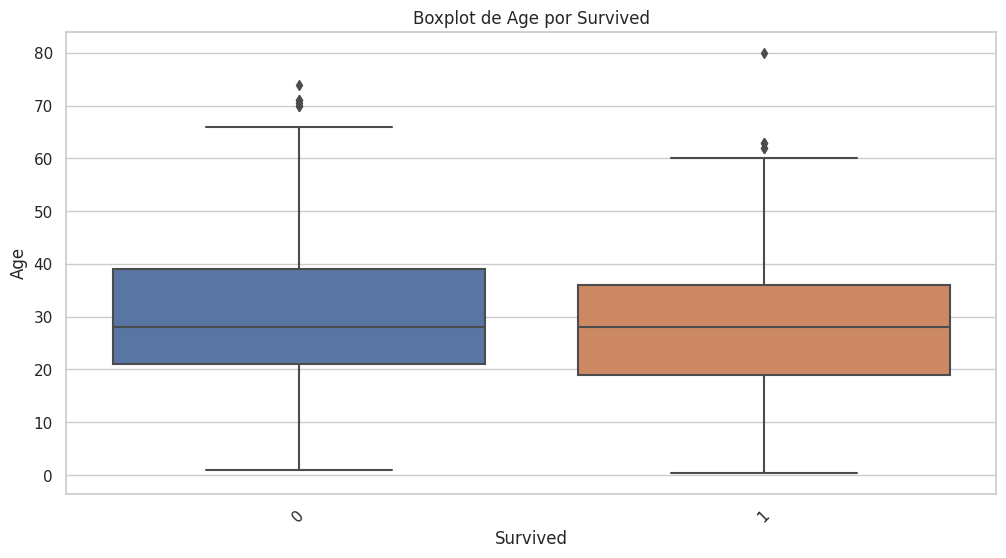

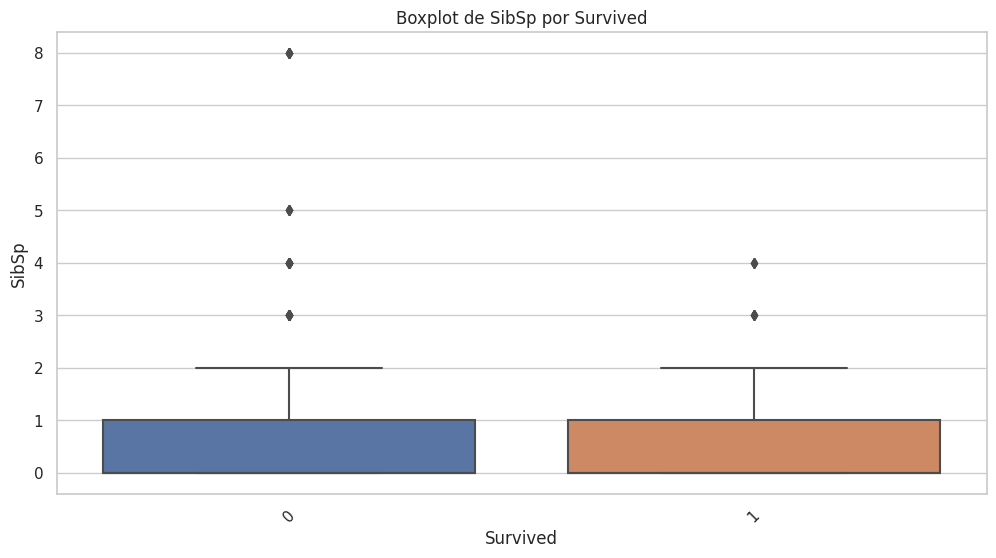

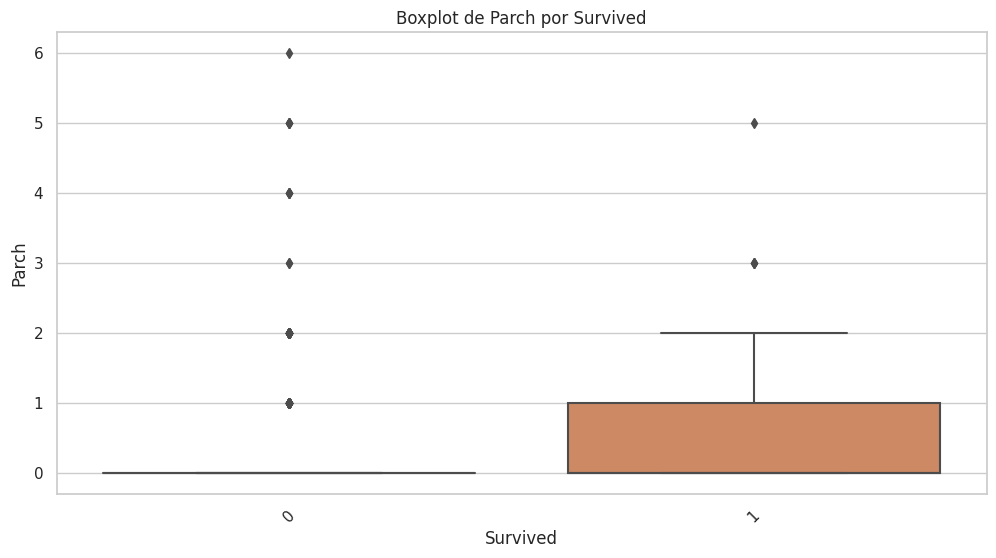

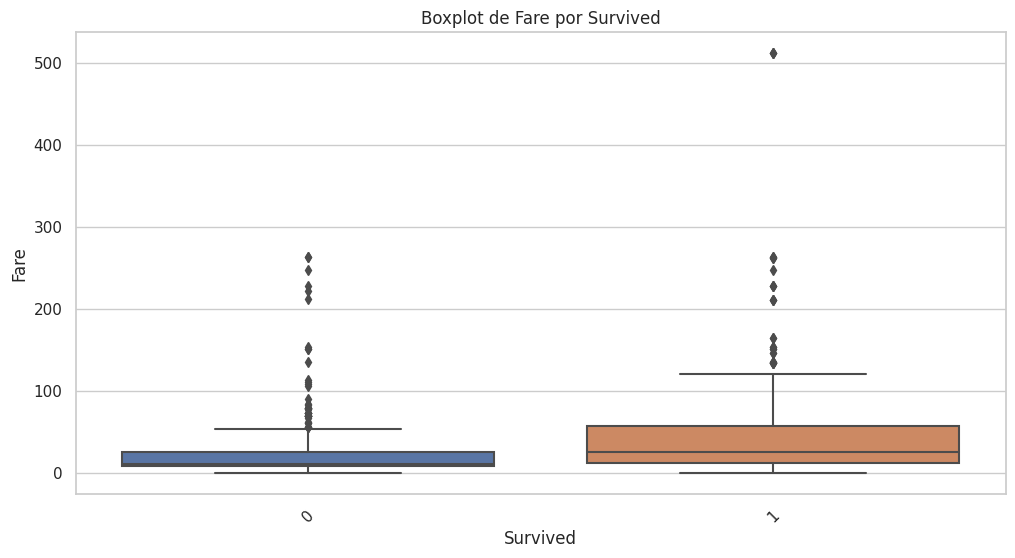

In [ ]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Itera a través de las columnas de variables_cualitativas
for categoria in variables_cuantitativas.columns:
    plt.figure(figsize=(12, 6))

    # Crea un boxplot para la variable categórica actual y la variable numérica (precio)
    sns.boxplot(x=train_df['Survived'], y=variables_cuantitativas[categoria])

    plt.title(f'Boxplot de {categoria} por Survived')
    plt.xlabel('Survived')
    plt.ylabel(categoria)
    plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x

    # Guarda o muestra el gráfico, según sea necesario
    # plt.savefig(f'boxplot_{categoria}.png')
    plt.show()

**Observaciones**:
- Los diagramas de **Age** y **SibSp** paercen trasplaparse, lo cual indica que las variables no tienen una buena colinealidad con **Survived**.
- Los diagramas de **Parch** y **Fare** parece que no se traslapan, lo cual señala que las variables pueden tener una clase de colinealidad con **Survived**.

#### 3.2.2 Variables cualitativas

##### 3.2.2.1 Distribución de los datos

En este apartado se observa la distribución de los datos de las variables cualitativas con las siguientes herramientas: histogramas de frecuencias y gráficas de pastel.

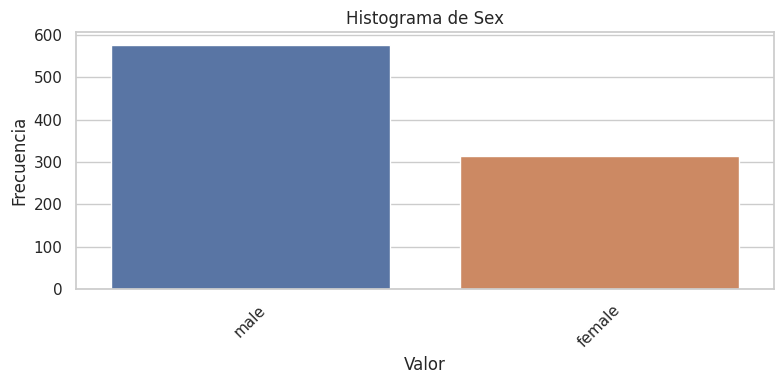

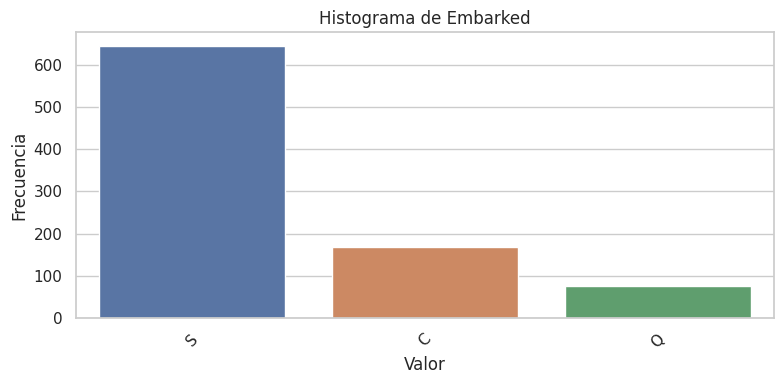

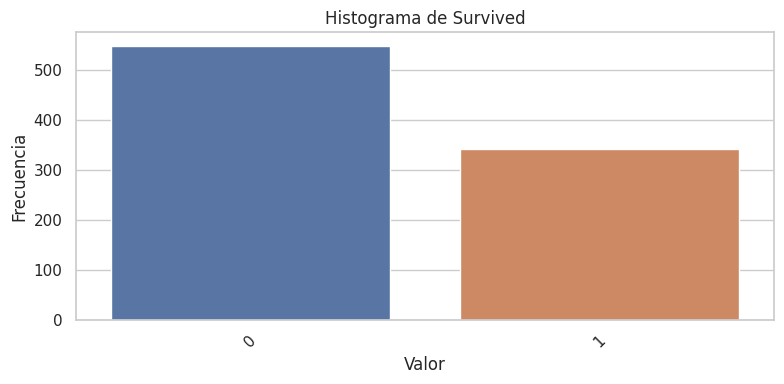

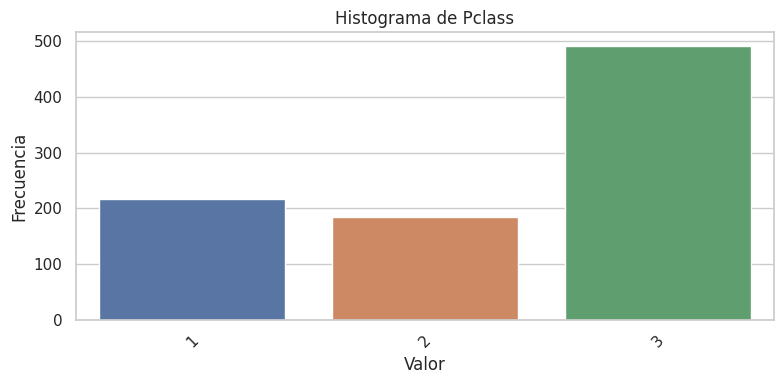

In [ ]:
# Iterate through the qualitative columns
for variable in variables_cualitativas.columns:
    if variable not in ['Name', 'Ticket', 'Cabin']:
        plt.figure(figsize=(8, 4))  # Set the figure size as per your preferences

        # Create a bar plot using Seaborn
        sns.countplot(data=variables_cualitativas, x=variable)

        # Add a title for each plot
        plt.title(f'Histograma de {variable}')

        # Axis labels
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        # Rotate x-axis labels if needed
        plt.xticks(rotation=45)

        # Adjust layout and display plots
        plt.tight_layout()
        plt.show()

**Observaciones:**
- Hay el doble de hombres que de mujeres.
- La mayoría de los pasajeros embarcaron en Southampton.
- Sólo sobrevivieron un poco más de la mita de los pasajeros.
- La mitad de los pasajeros pertenecen a la clase tres.

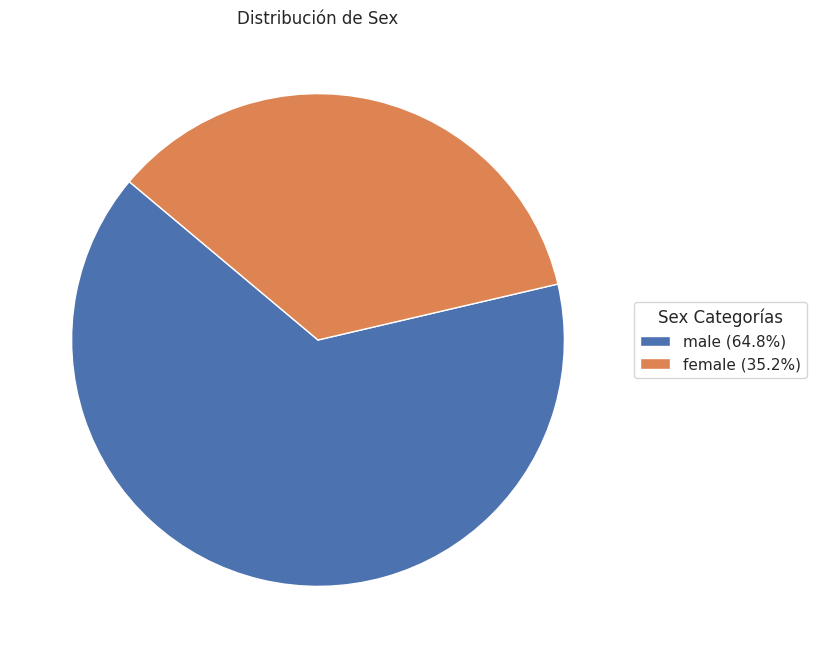

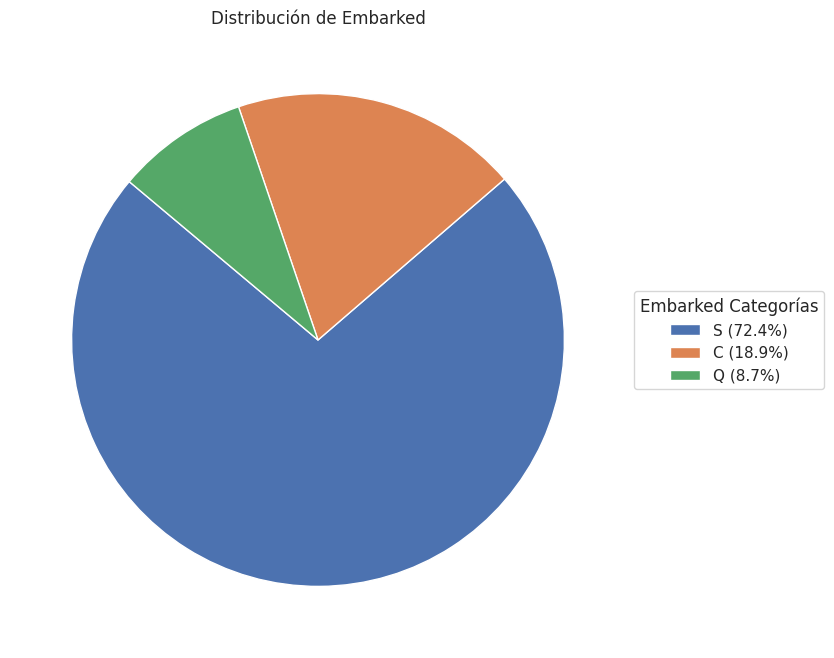

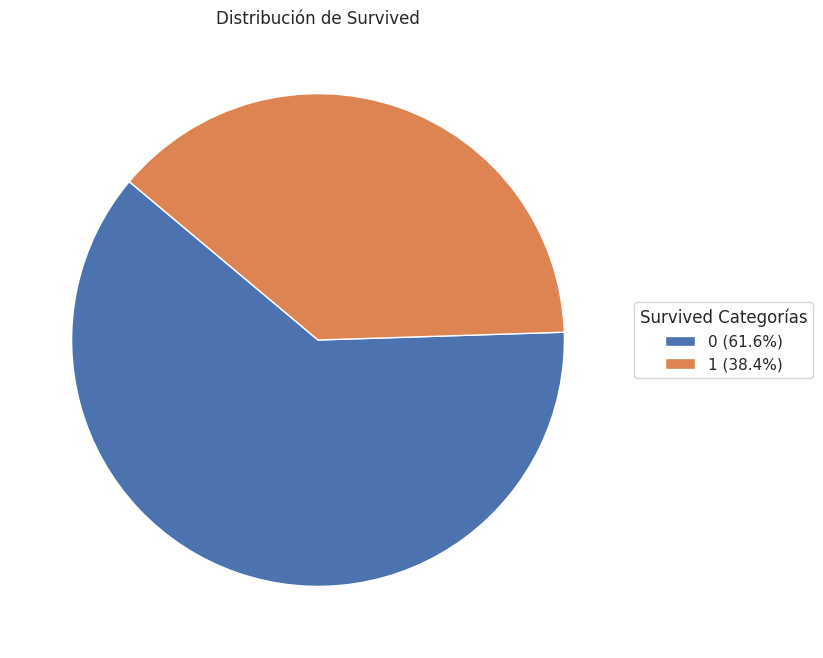

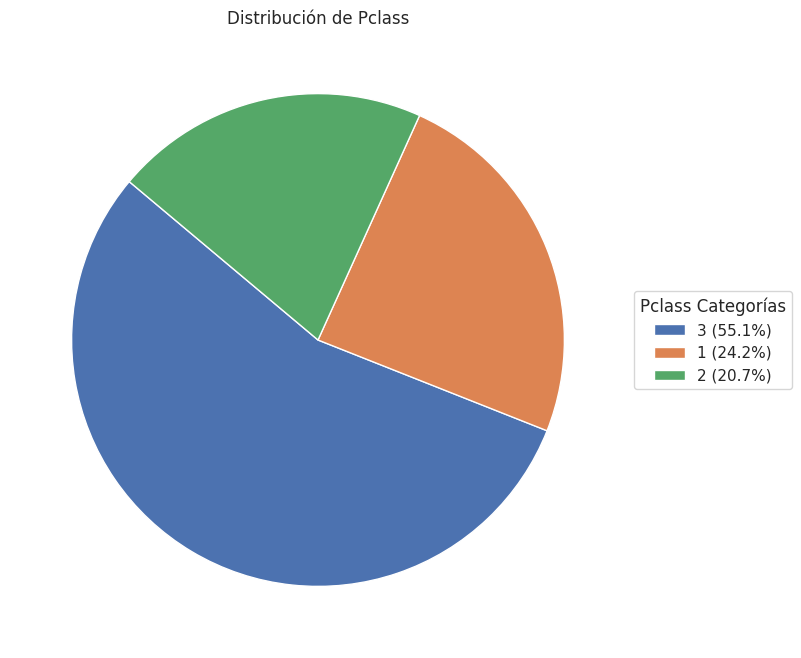

In [ ]:
# Itera a través de las columnas cualitativas
for variable in variables_cualitativas.columns:
  if variable not in ['Name', 'Ticket', 'Cabin']:
    plt.figure(figsize=(8, 8))

    # Calcula la frecuencia de cada categoría
    data = variables_cualitativas[variable].value_counts()

    # Crea el diagrama de pastel utilizando Seaborn
    sns.set(style="whitegrid")  # Configura el estilo de Seaborn
    pie_chart, _, autopcts = plt.pie(data, labels=None, autopct='', startangle=140, pctdistance=0.85)

    # Obtiene los nombres de las categorías directamente desde el índice del DataFrame
    category_names = data.index

    # Calcula los porcentajes manualmente y crea una lista de etiquetas para la leyenda
    total = sum(data)
    percentages = [(count / total) * 100 for count in data]
    legend_labels = [f'{category} ({percentage:.1f}%)' for category, percentage in zip(category_names, percentages)]

    # Agrega un título específico para cada gráfico
    plt.title(f'Distribución de {variable}')

    # Agrega una leyenda con los colores, etiquetas y porcentajes
    plt.legend(legend_labels, title=f'{variable} Categorías', loc='center left', bbox_to_anchor=(1, 0.5))

    # Muestra el gráfico con un título y sin etiqueta en el eje y
    plt.ylabel('')

    plt.show()

**Observación:** En estos diagramas se contempla la distribución de los valores de cada variable de manera más exacta. Las observaciones previamiente realizadas solo fueron estimaciones. Se proporcionan estos procentajes con la intención de hacer referencia a ellos más adelante.

##### 1.2.2.2 Análisis de colinealidad
Para analizar la colinealidad entre las variables cualitativas y la supervivencia se utilizan histogramas de frecuencia de cada variable por factor de superviviencia.

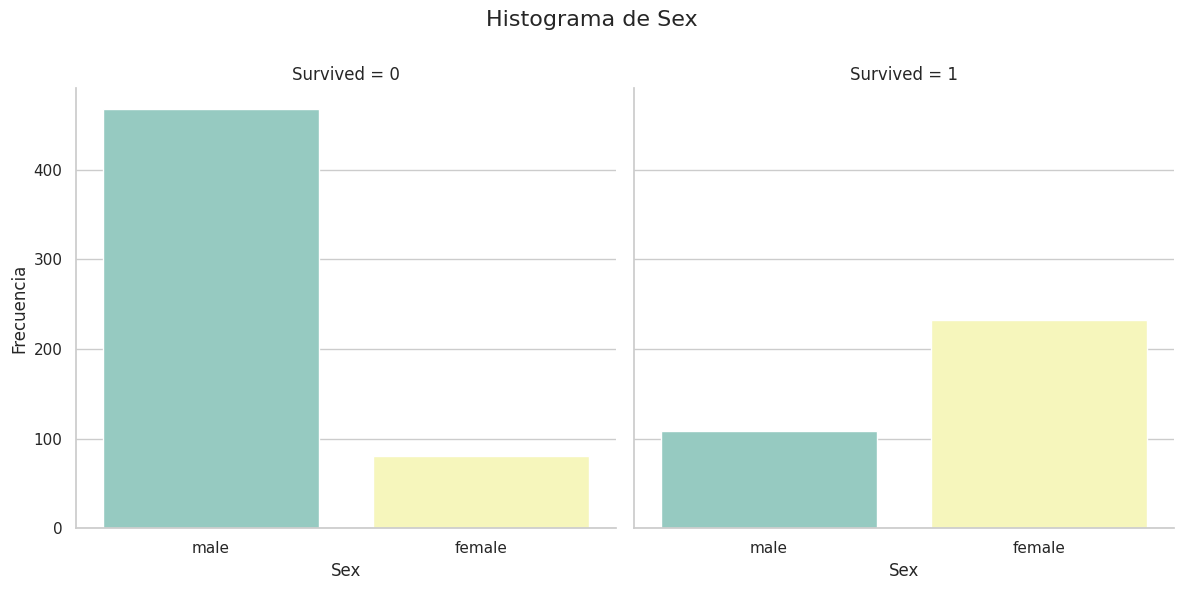

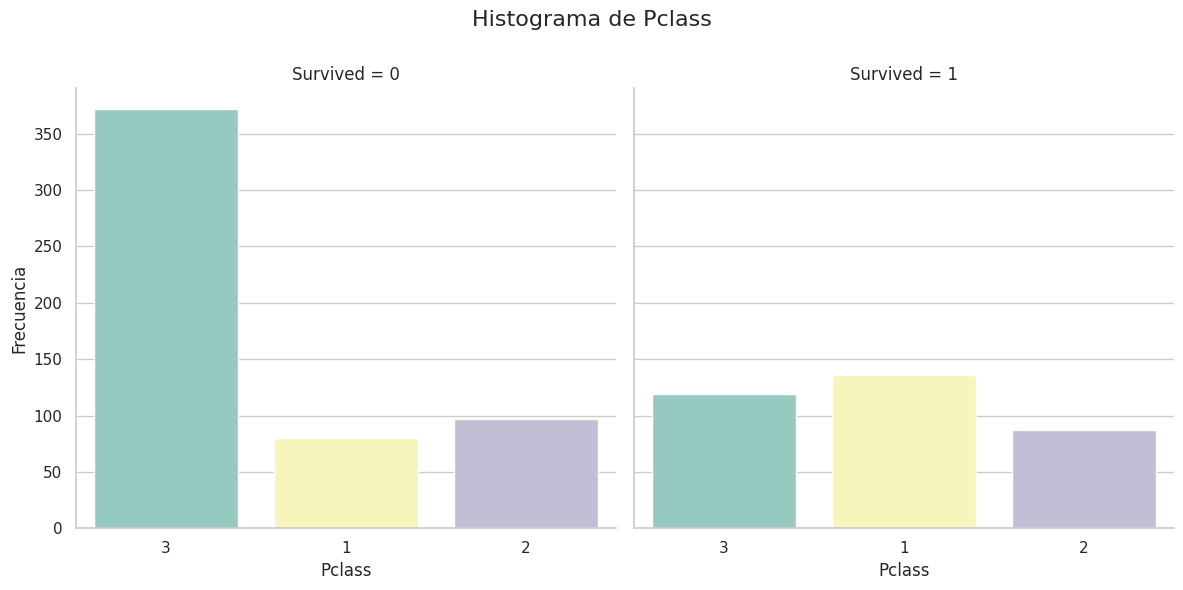

In [ ]:
# Filter out unwanted columns
filtered_cols = [col for col in variables_cualitativas.columns if col not in ['Name', 'Ticket', 'Cabin', 'Embarked', 'Survived']]

# Iterate through filtered columns
for variable in filtered_cols:
    # Create a FacetGrid with a larger height
    g = sns.FacetGrid(train_df, col='Survived', height=6)

    # Map a countplot for the current variable and specify the order
    g.map(sns.countplot, variable, palette='Set3', order=train_df[variable].value_counts().index)

    # Set a title for the current plot
    plt.subplots_adjust(top=0.85)  # Adjust the title position
    g.fig.suptitle(f'Histograma de {variable}', fontsize=16)
    g.set_axis_labels(variable, 'Frecuencia')

# Show the plots
plt.show()

**Observaciones:**
- Aproximadamente, 20% de los hombres sobrevivieron. Por otro lado, aproximandamente el 75% de las mujeres sobrevivieron.
- Sólo sobrevivió un tercio de los pasajeros de tercera clase y la mitad de los de primera. Por otro lado, los de segunda clase tienen casi la misma proporcion para ambos casos.
- Faltan algunas variables de graficar pero primero tiene que pasar por un proceso de transformación.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.3 Conclusiones

Se puede conluir que los puntos de apoyo para el posterior proceso de transformación de datos seran los siguientes:
- Valores nulos de **Age** (19.87%), **Cabin** (77.10%) y **Embarked** (0.22%).
- **SibSp** y **Parch** no parecen ser tan diferentes.
- El mínimo para los valores de **Fare** es cero.
- Valores únicos para **Name** y **PassengerId**.
- Valores únicos para **Ticket** (23.57%) y **Cabin** (27.94%).
- **Sex**, **Embarked**, **Survived**, y **Pclass** cuentan con muy pocos valores únicos.
- **Parch** (23.91%) y **Fare** (13.02%) tienen datos atípicos.
- **SibSp** (5.16%) y **Age** (1.23%) tienen un porcentaje más bajo de datos atípicos.
- Simetría y formas de la distribución para variables cuantiativas.
- Tasa de supervivencia por sexo y clase.
- Faltan algunas variables por graficar.

## 4. Transformación (Transform)

El proceso de transformación en ETL es una fase fundamental en la gestión de datos y se encarga de limpiar, estructurar y enriquecer los datos extraídos de múltiples fuentes antes de cargarlos en un almacén de datos o un sistema destino. En esta fase se garantiza que los datos sean coherentes, útiles y estén listos para su posterior uso dentro del modelo.

Para llevar a cabo este proceso las siguientes tareas se tomaran en cuenta:
1. Identificación y eliminación de duplicados.
2. Detección y manejo de valores nulos o faltantes.
3. Codificación de variables categóricas y discretización.
4. Ingeniería inversa para crear variables.
5. Eliminación de atributos.

Este proceso se aplicará tanto en el subconjunto de entrenamiento (train_df) como en el de prueba (test_df).

### 4.1 Identificación y eliminación de duplicados
Considerando que la eliminación y gestión adecuada de duplicados puede tener un impacto significativo en la calidad y la integridad de los datos se realizó una revisión sobre los siguientes elementos: registros, identificadores de pasajeros, nombres y tickets.

In [ ]:
def check_duplicates(dataframe, columns_to_check, dataframe_name):
    print(f"{dataframe_name} dataframe")

    # Verificar registros duplicados
    duplicados = dataframe[dataframe.duplicated()]
    if len(duplicados) > 0:
        print(f"Registros duplicados encontrados: {len(duplicados)}.")
    else:
        print("No se encontraron duplicados en registros.")

    # Verificar registros de variables duplicados
    for column_name in columns_to_check:
        duplicate_rows = dataframe[dataframe.duplicated(subset=[column_name])]

        if duplicate_rows.shape[0] > 0:
            print(f"{column_name} duplicados encontrados: {len(duplicate_rows)}.")
        else:
            print(f"No se encontraron duplicados en {column_name}.")

# Lista de columnas que deseas verificar
columns_to_check = ['PassengerId', 'Name', 'Ticket']

check_duplicates(train_df, columns_to_check, 'Train')
print("\n")
check_duplicates(test_df, columns_to_check, 'Test')

Train dataframe
No se encontraron duplicados en registros.
No se encontraron duplicados en PassengerId.
No se encontraron duplicados en Name.
Ticket duplicados encontrados: 210.


Test dataframe
No se encontraron duplicados en registros.
No se encontraron duplicados en PassengerId.
No se encontraron duplicados en Name.
Ticket duplicados encontrados: 55.


**Observación:** El único elemento en el que se identificaron duplicados es "tickets". Esto indica que algunos pasajeros tienen el mismo ticket. Dentro del contexto del problema esto puede significar, bajo la suposición de que cada ticket debería de ser único, que hubo algún error al registrar los tickets para cada pasajero. Además, considerando que el modelo utilizado trabajará sobre valores numéricos, los valores de la variable no aportarian mucho después de una transformación a valores numéricos. Por lo tanto, **Ticket** se elimina de la base de datos.

In [ ]:
# Eliminar Ticket de dataframes
def eliminar_tickets(dataframe):
  dataframe.drop('Ticket', axis=1, inplace=True)
  return dataframe

train_df = eliminar_tickets(train_df)
test_df = eliminar_tickets(test_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 4.2 Detección y manejo de valores nulos o faltantes

Para asegurar una limpieza y mantenimiento correcto de la información se revisan cúales atributos pueden tener datos nulos con fin de ver si es posible modificar los datos o descartarlos.


In [ ]:
# Funcion que identifica la cantidad de valores nulos por atributo de dataframe
def identificar_nulos(dataframe, dataframe_name):
  print(dataframe_name + " dataframe")
  print(dataframe.isnull().sum())

identificar_nulos(train_df, "Train")
print("\n")
identificar_nulos(test_df, "Test")


Train dataframe
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test dataframe
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Observaciones**:
- Las observaciones de valores nulos realizada anteriormente coincide con los resultados presentes en el subconjunto de entrenamiento.
- En el subconjunto de prueba se tienen valores nulos para **Age**, **Fare** y **Cabin**.
- Bajo estos hechos se puede asumir que para una muestra aleatoria del conjunto de datos del Titanic es posible que en las siguientes variables poseean valores nulos: **Cabin**, **Age**, **Embarked** y **Fare**.

**¿Qué se puede hacer con estos valores nulos?**
- Reemplazar los valores por un promedio para **Age**, **Embarked** y **Fare**.
- Eliminar la variable **Cabin**, debido a su gran cantidad de valores nulos.

#### 4.2.1 Reemplazo de valores nulos por promedio

In [ ]:
# AGE
def reemplazar_nulos_age(dataframe):
  # Calcula el promedio de edad por titulo
  dataframe_sin_nulos = dataframe.dropna(subset=["Age"]).copy()
  dataframe_sin_nulos["Title"] = dataframe_sin_nulos["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
  average_age_by_title = dataframe_sin_nulos.groupby("Title")["Age"].mean()
  average_age_by_title = average_age_by_title.to_dict()

  # Reemplazan los datos nulos por el promedio de edad por titulo
  dataframe["Title"] = dataframe["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
  dataframe["Age"].fillna(dataframe["Title"].map(average_age_by_title), inplace=True)

  # Calcula el promedio de edad global
  dataframe_sin_nulos = dataframe.dropna(subset=["Age"]).copy()
  mean_age = dataframe_sin_nulos["Age"].mean()

  # Reemplazan los datos nulos restantes por el promedio de edad global
  dataframe["Age"].fillna(mean_age, inplace=True)

  return dataframe

train_df = reemplazar_nulos_age(train_df)
test_df = reemplazar_nulos_age(test_df)

identificar_nulos(train_df, "Train")
print("\n")
identificar_nulos(test_df, "Test")

Train dataframe
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


Test dataframe
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [ ]:
# EMBARKED
def reemplazar_nulos_embarked(dataframe):
  # Filtra el DataFrame para obtener solo las filas con valores no nulos.
  dataframe_sin_nulos = dataframe.dropna(subset=["Embarked"]).copy()
  # Usar el método mode() para obtener la moda de la columna 'Embarked'
  moda = dataframe_sin_nulos['Embarked'].mode().iloc[0]
  # Fill NaN values in the "Embarked" column with the mean value
  dataframe["Embarked"].fillna(moda, inplace=True)
  return dataframe

train_df = reemplazar_nulos_embarked(train_df)
test_df = reemplazar_nulos_embarked(test_df)

identificar_nulos(train_df, "Train")
print("\n")
identificar_nulos(test_df, "Test")

Train dataframe
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


Test dataframe
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [ ]:
# FARE
def reemplazar_nulos_fare(dataframe):
  # Filtra el DataFrame para obtener solo las filas con valores no nulos.
  dataframe_sin_nulos = dataframe.dropna(subset=["Fare"]).copy()
  # Usar el método mode() para obtener la moda de la columna 'Embarked'
  mean = dataframe_sin_nulos["Fare"].mean()
  # Fill NaN values in the "Embarked" column with the mean value
  dataframe["Fare"].fillna(mean, inplace=True)
  return dataframe

train_df = reemplazar_nulos_fare(train_df)
test_df = reemplazar_nulos_fare(test_df)

identificar_nulos(train_df, "Train")
print("\n")
identificar_nulos(test_df, "Test")

Train dataframe
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


Test dataframe
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


#### 4.2.2 Eliminación de la variable **Cabin**

In [ ]:
# Eliminar Ticket de dataframes
def eliminar_cabin(dataframe):
  dataframe.drop('Cabin', axis=1, inplace=True)
  return dataframe

train_df = eliminar_cabin(train_df)
test_df = eliminar_cabin(test_df)

identificar_nulos(train_df, "Train")
print("\n")
identificar_nulos(test_df, "Test")

Train dataframe
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


Test dataframe
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


### 4.3 Codificación de variables categóricas y discretización

Para que el modelo por implementar funcione es necesario convertir todos los valores de las variables categóricas a valores numéricos. Además, para mejorar su desempeño conviene homogeneizar los datos de todas las variables.

#### 4.3.1 Conversión de variables categóricas a valores numéricos

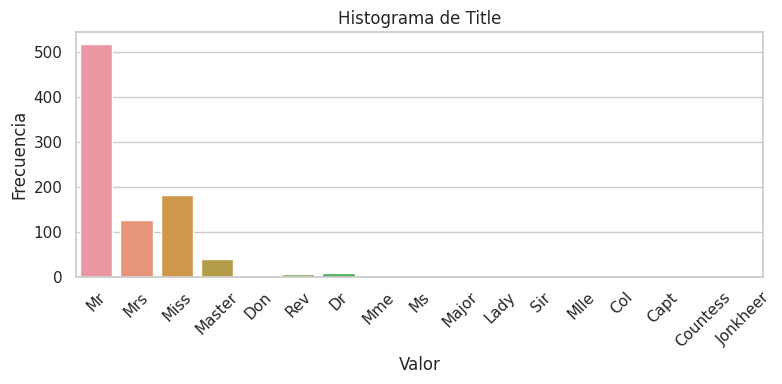

In [ ]:
plt.figure(figsize=(8, 4))  # Set the figure size as per your preferences

# Create a bar plot using Seaborn
sns.countplot(data=train_df, x='Title')

# Add a title for each plot
plt.title('Histograma de Title')

# Axis labels
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

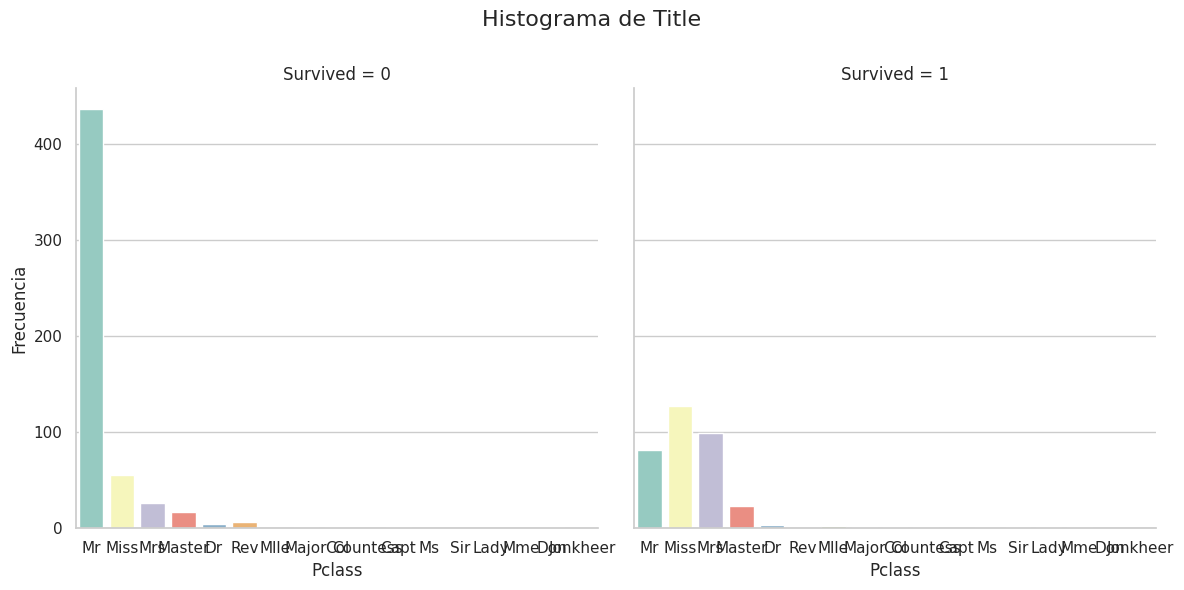

In [ ]:
# Create a FacetGrid with a larger height
g = sns.FacetGrid(train_df, col='Survived', height=6)

# Map a countplot for the current variable and specify the order
g.map(sns.countplot, 'Title', palette='Set3', order=train_df['Title'].value_counts().index)

# Set a title for the current plot
plt.subplots_adjust(top=0.85)  # Adjust the title position
g.fig.suptitle('Histograma de Title', fontsize=16)
g.set_axis_labels(variable, 'Frecuencia')
plt.show()

In [ ]:
def convertir_variables_categoricas(dataframe):
  # Mapeo de valores en la columna 'Sex' a valores enteros
  mapeo_sexo = {'male': 1, 'female': 0}
  dataframe['Sex'] = dataframe['Sex'].map(mapeo_sexo)

  # Mapeo de valores en la columna 'Embarked' a valores enteros
  mapeo_embarcada = {'C': 1, 'S': 2, 'Q': 3}
  dataframe['Embarked'] = dataframe['Embarked'].map(mapeo_embarcada)

  # Replace titles not in the valid_titles list with 'Other'
  valid_titles = ['Mr', 'Mrs', 'Miss', 'Master']
  dataframe['Title'] = dataframe['Title'].apply(lambda x: x if x in valid_titles else 'Other')

  # Mapeo de valores en la columna 'Embarked' a valores enteros
  mapeo_embarcada = {'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Other': 5}
  dataframe['Title'] = dataframe['Title'].map(mapeo_embarcada)

  return dataframe

train_df = convertir_variables_categoricas(train_df)
test_df = convertir_variables_categoricas(test_df)

#### 4.3.2 Discretización de variables

In [ ]:
splits = 5  # Número de divisiones

# Función para discretizar y llenar valores nulos
def discretize_and_fillna(df, column_name):
    df[column_name] = pd.qcut(df[column_name], splits, labels=False, duplicates='drop').fillna(5).astype(int) + 1

# Aplicar la función a 'Fare' y 'Age' en train_df
discretize_and_fillna(train_df, 'Fare')
discretize_and_fillna(train_df, 'Age')

# Aplicar la misma función a 'Fare' y 'Age' en test_df
discretize_and_fillna(test_df, 'Fare')
discretize_and_fillna(test_df, 'Age')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,5,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,2,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,5,2,2
4,5,0,3,"Allen, Mr. William Henry",1,4,0,0,2,2,1


### 4.4 Ingeniería inversa para crear variables

In [ ]:
# Crear variable de isAlone
def ingenieria_inversa_isalone(dataframe):
  dataframe['Fam'] = dataframe['SibSp'] + dataframe['Parch']
  dataframe['IsAlone'] = (dataframe['Fam'] == 0).astype(int)
  dataframe.drop('Fam', axis=1, inplace=True)
  return dataframe

train_df = ingenieria_inversa_isalone(train_df)
test_df = ingenieria_inversa_isalone(test_df)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,4,1,0,5,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,2,2,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,5,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,4,0,0,2,2,1,1


### 4.5 Eliminación de atributos

Los atributos que consideramos eliminar de nuestros conjuntos de datos son los siguientes:
* Name: No lo necesitamos para el modelo debido a que no tiene una directa correlación con la supervivencia de los pasajeros. Se podría utilizar como identificador de los registros, pero para esto ya tenemos el atributo "PassengerId".
* Title: Solo lo necesitamos para estimar la edad para los pasajeros que no tenían registrado este atributo y reemplazar los valores nulos de acuerdo a este estimado.
* Cabin: No conviene utilizarlo debido a su gran porcentaje de valores nulos. En el dataset de entrenamiento el 77.1% de sus valores son nulos, mientras que en el dataset de prueba correponde a 78.2%. Además, los valores de esta columna son cadenas de texto que difícilmente se pueden traducir a un valor numérico.
* Ticket: No conviene utilizarlo debido a que es un valor con tipos de datos mezclados y no se puede simplificar a un valor numérico. Además cuenta con un considerabel porcentaje de valores nulos y no creemos que tenga una correlación directa con la supervivencia de los pasajeros.

In [ ]:
def eliminar_variables(dataframe, name_df):
  if name_df == "Train":
    dataframe = dataframe.drop(['Name', 'PassengerId', 'SibSp', 'Parch'], axis='columns')
  else:
    dataframe = dataframe.drop(['Name', 'SibSp', 'Parch'], axis='columns')

  return dataframe

train_df = eliminar_variables(train_df, "Train")
test_df = eliminar_variables(test_df, "Test")

test_df


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,4,2,3,1,1
1,893,3,0,5,1,2,2,0
2,894,2,1,5,2,3,1,1
3,895,3,1,3,2,2,1,1
4,896,3,0,2,3,2,2,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,3,2,2,1,1
414,1306,1,0,4,5,1,5,1
415,1307,3,1,4,1,2,1,1
416,1308,3,1,3,2,2,1,1


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,2,1,2,1,0
1,1,1,0,4,5,1,2,0
2,1,3,0,2,2,2,3,1
3,1,1,0,4,5,2,2,0
4,0,3,1,4,2,2,1,1


## 5. Exportar datos (Load)

In [ ]:
# Organizar columnas de los dataframes
orden_train = ['Pclass', 'Age', 'Sex', 'IsAlone', 'Fare', 'Embarked', 'Title', 'Survived']
orden_test = ['PassengerId', 'Pclass', 'Age', 'Sex', 'IsAlone', 'Fare', 'Embarked', 'Title']
train_df = train_df[orden_train]
test_df = test_df[orden_test]

# Guardar a archivo csv
train_df.to_csv('train_etl.csv', index=False)
test_df.to_csv('test_etl.csv', index=False)

print("Archivos CSV guardados exitosamente.")

Archivos CSV guardados exitosamente.
